In [8]:
import pandas as pd 
!pip  install openpyxl
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
data1=pd.read_csv('new_house_price.csv', encoding='utf-8')
new_df=pd.DataFrame()

data1.head()

,geo,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,NaN,NaN,NaN,76.80,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,126.60,136.31,153.26
1,BE,Belgium,72.49,79.56,85.76,89.54,89.12,91.92,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,113.78,118.60,127.06
2,BG,Bulgaria,80.09,91.86,118.42,147.97,117.79,105.81,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,131.42,137.41,149.33
3,CY,Cyprus,97.06,108.57,121.32,128.17,119.76,112.90,111.09,107.70,103.29,101.47,100,100.27,102.52,104.32,108.20,107.98,104.33
4,CZ,Czech,NaN,NaN,NaN,100.80,96.90,95.20,95.30,93.90,93.90,96.20,100,107.20,119.70,130.00,141.90,153.90,184.20


In [10]:

# Check if it loaded correctly
print("Shape:", data1.shape)
print("Columns:", data1.columns.tolist())
print(data1.head())


Shape: (29, 19)
Columns: ['geo', 'country', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
  geo   country   2005    2006    2007    2008    2009    2010    2011  \
0  AT   Austria    NaN     NaN     NaN     NaN     NaN   76.80   81.60   
1  BE   Belgium  72.49   79.56   85.76   89.54   89.12   91.92   95.61   
2  BG  Bulgaria  80.09   91.86  118.42  147.97  117.79  105.81   99.98   
3  CY    Cyprus  97.06  108.57  121.32  128.17  119.76  112.90  111.09   
4  CZ     Czech    NaN     NaN     NaN  100.80   96.90   95.20   95.30   

     2012    2013    2014  2015    2016    2017    2018    2019    2020  \
0   87.57   92.10   95.33   100  108.53  114.26  119.64  126.60  136.31   
1   97.75   98.90   98.35   100  102.64  106.37  109.42  113.78  118.60   
2   98.07   95.92   97.29   100  107.02  116.30  123.96  131.42  137.41   
3  107.70  103.29  101.47   100  100.27  102.52  104.32  108.20  107.98   


In [11]:

data1 = data1.drop(['2005', '2006', '2007', '2008', '2009', '2010'], axis=1)
data1 = data1[data1['country'] != 'United Kingdom']

In [12]:
#data from inflation
file_path = r'Inflation-data______new.xlsx'
df = pd.read_excel(file_path, sheet_name=0)
df = df.drop(columns=[col for col in df.columns if isinstance(col, int) and (col < 2011 or col > 2021)])

# Displaying column names after keeping only years from 2010 to 2021
print("\n  Columns after keeping only years 2010 - 2021 ===")
print(list(df.columns))
countries_to_keep = [
    "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia", "Ireland",
    "Greece", "Spain", "France", "Italy", "Latvia",
    "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands", "Austria",
    "Poland", "Portugal", "Slovenia", "Slovakia", "Finland",
    "Sweden", "Iceland", "Norway"
]

df = df[df["Country"].isin(countries_to_keep)]
print(df["Country"].unique())
df = df.reset_index(drop=True)
df_2= df.drop(columns=["Country Code", "IMF Country Code", "Indicator Type"])
df_2 = df_2.rename(columns={'Country':'country'})
df_2.columns


  Columns after keeping only years 2010 - 2021 ===
['Country Code', 'IMF Country Code', 'Country', 'Indicator Type', 'Series Name', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
['Austria' 'Belgium' 'Bulgaria' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Slovenia' 'Spain' 'Sweden']


Index([    'country', 'Series Name',          2011,          2012,
                2013,          2014,          2015,          2016,
                2017,          2018,          2019,          2020,
                2021],
      dtype='object')

In [13]:
#data from earnings
df = pd.read_csv('Earnings.csv')
# Drop unwanted year columns
newdf = df.drop(columns=['2005','2006','2007','2008','2009','2022','2023','2024'])
df.head()

,TIME,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,"21,273.34","21,880.46","22,396.96","23,405.30","24,323.59","24,873.45","25,519.86","26,287.51","26,609.37",...,"26,953.59","27,574.37","28,238.77","29,240.96","30,188.71","30,539.81","31,063.95","32,889.21","35,438.98","36,672.38"
2,Bulgaria,:,:,:,"2,605.86","2,951.37","3,202.34","3,396.45","3,598.45","3,798.06",...,"4,339.15","4,689.05","5,132.74","5,447.10","6,093.02","6,612.77","7,456.68","8,569.19","9,890.39","11,073.90"
3,Czechia,"5,587.37","6,394.53","6,962.34","8,345.91","8,240.09","8,832.96","9,257.22","9,311.44","8,973.79",...,"9,017.25","9,446.75","10,263.30","11,256.33","11,992.68","11,974.40","13,969.74","15,703.05","17,265.60","17,290.99"
4,Denmark,"26,440.34","27,243.49","28,469.57","29,595.89","30,962.07","32,349.16","33,153.43","33,617.32","33,873.44",...,"34,689.46","35,021.65","35,558.92","36,307.24","37,133.59","37,878.85","39,315.61","40,710.04","42,357.77","43,912.73"


In [14]:

newdf = newdf.reset_index(drop=True)
# Drop specific rows (indices 11 and 13)
newdf = newdf.drop(index=[11,13])
newdf = newdf.rename(columns={'TIME':'country'})
# Drop the first row
newdf_3= newdf.drop(index=0).reset_index(drop=True)
print(newdf_3.head())
print("data1 cols:", data1.columns.tolist())
print("df cols:", df_2.columns.tolist())
print("new_df cols:", newdf_3.columns.tolist())


    country       2010       2011       2012       2013       2014       2015  \
0   Belgium  24,873.45  25,519.86  26,287.51  26,609.37  26,775.94  26,953.59   
1  Bulgaria   3,202.34   3,396.45   3,598.45   3,798.06   4,033.73   4,339.15   
2   Czechia   8,832.96   9,257.22   9,311.44   8,973.79   8,694.95   9,017.25   
3   Denmark  32,349.16  33,153.43  33,617.32  33,873.44  34,330.38  34,689.46   
4   Germany  25,374.06  26,088.04  26,729.62  27,171.02  27,791.42  28,410.71   

        2016       2017       2018       2019       2020       2021  
0  27,574.37  28,238.77  29,240.96  30,188.71  30,539.81  31,063.95  
1   4,689.05   5,132.74   5,447.10   6,093.02   6,612.77   7,456.68  
2   9,446.75  10,263.30  11,256.33  11,992.68  11,974.40  13,969.74  
3  35,021.65  35,558.92  36,307.24  37,133.59  37,878.85  39,315.61  
4  28,986.32  29,468.63  30,419.87  31,486.26  31,292.95  32,850.20  
data1 cols: ['geo', 'country', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'

In [15]:
# Ensure consistent data types and strip spaces
data1['country'] = data1['country'].astype(str).str.strip()
df_2['country'] = df_2['country'].astype(str).str.strip()
newdf_3['country'] = newdf_3['country'].astype(str).str.strip()

# Merge house price and inflation
merged = pd.merge(data1, df_2, on='country', how='inner', suffixes=('_house_price', '_inflation'))

# Merge earnings
merged = pd.merge(merged, newdf_3, on='country', how='inner')

# Rename columns
new_columns = []
for col in merged.columns:
    col_str = str(col)  # Ensure column name is a string
    if col_str.endswith('_x'):
        new_columns.append(col_str.replace('_x', '_house_price'))
    elif col_str.endswith('_y'):
        new_columns.append(col_str.replace('_y', '_earning'))
    elif col_str.isdigit():  # Numeric columns (e.g., years)
        new_columns.append(f"{col_str}_inflation")
    else:
        new_columns.append(col_str)  # Keep other columns unchanged

merged.columns = new_columns

# Print final column names
print("✅ Final columns:", merged.columns.tolist())

✅ Final columns: ['geo', 'country', '2011_house_price', '2012_house_price', '2013_house_price', '2014_house_price', '2015_house_price', '2016_house_price', '2017_house_price', '2018_house_price', '2019_house_price', '2020_house_price', '2021_house_price', 'Series Name', '2011_inflation', '2012_inflation', '2013_inflation', '2014_inflation', '2015_inflation', '2016_inflation', '2017_inflation', '2018_inflation', '2019_inflation', '2020_inflation', '2021_inflation', '2010_inflation', '2011_earning', '2012_earning', '2013_earning', '2014_earning', '2015_earning', '2016_earning', '2017_earning', '2018_earning', '2019_earning', '2020_earning', '2021_earning']


In [16]:
merged.head(4)

,geo,country,2011_house_price,2012_house_price,2013_house_price,2014_house_price,2015_house_price,2016_house_price,2017_house_price,2018_house_price,...,2012_earning,2013_earning,2014_earning,2015_earning,2016_earning,2017_earning,2018_earning,2019_earning,2020_earning,2021_earning
0,AT,Austria,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,...,"26,893.06","27,520.54","27,965.34","28,524.14","30,601.53","31,083.14","31,640.93","32,325.12","33,032.37","33,712.20"
1,BE,Belgium,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,...,"26,287.51","26,609.37","26,775.94","26,953.59","27,574.37","28,238.77","29,240.96","30,188.71","30,539.81","31,063.95"
2,BG,Bulgaria,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,...,"3,598.45","3,798.06","4,033.73","4,339.15","4,689.05","5,132.74","5,447.10","6,093.02","6,612.77","7,456.68"
3,DE,Germany,86.80,89.80,92.60,95.50,100,107.50,114.10,121.70,...,"26,729.62","27,171.02","27,791.42","28,410.71","28,986.32","29,468.63","30,419.87","31,486.26","31,292.95","32,850.20"


In [17]:
merged = merged.drop(['2010_inflation'], axis=1)
merged.columns

Index(['geo', 'country', '2011_house_price', '2012_house_price',
       '2013_house_price', '2014_house_price', '2015_house_price',
       '2016_house_price', '2017_house_price', '2018_house_price',
       '2019_house_price', '2020_house_price', '2021_house_price',
       'Series Name', '2011_inflation', '2012_inflation', '2013_inflation',
       '2014_inflation', '2015_inflation', '2016_inflation', '2017_inflation',
       '2018_inflation', '2019_inflation', '2020_inflation', '2021_inflation',
       '2011_earning', '2012_earning', '2013_earning', '2014_earning',
       '2015_earning', '2016_earning', '2017_earning', '2018_earning',
       '2019_earning', '2020_earning', '2021_earning'],
      dtype='object')

In [18]:
# Convert wide to long for house prices, inflation, and earnings
house_price = merged.melt(id_vars=['geo','country'], 
                          value_vars=[col for col in merged.columns if 'house_price' in col],
                          var_name='year', value_name='house_price')

inflation = merged.melt(id_vars=['geo','country'], 
                        value_vars=[col for col in merged.columns if 'inflation' in col],
                        var_name='year', value_name='inflation')

earning = merged.melt(id_vars=['geo','country'], 
                      value_vars=[col for col in merged.columns if 'earning' in col],
                      var_name='year', value_name='earning')

# Clean up year column
for df in [house_price, inflation, earning]:
    df['year'] = df['year'].str.extract(r'(\d{4})').astype(int)
df['earning'] = df['earning'].replace({',': ''}, regex=True).astype(float)

# Merge them together
df_long = house_price.merge(inflation, on=['geo','country','year']).merge(earning, on=['geo','country','year'])
df_long.head(15)


,geo,country,year,house_price,inflation,earning
0,AT,Austria,2011,81.60,1.833637,26375.67
1,BE,Belgium,2011,95.61,1.807151,25519.86
2,BG,Bulgaria,2011,99.98,5.941922,3396.45
3,DE,Germany,2011,86.80,1.079937,26088.04
4,EE,Estonia,2011,69.32,5.399596,8324.26
5,ES,Spain,2011,124.27,-0.020117,19891.57
6,FI,Finland,2011,96.87,2.623597,28421.92
7,FR,France,2011,105.46,0.948142,25576.25
8,HU,Hungary,2011,90.45,1.927564,6146.32
9,IE,Ireland,2011,87.86,1.315972,31159.23


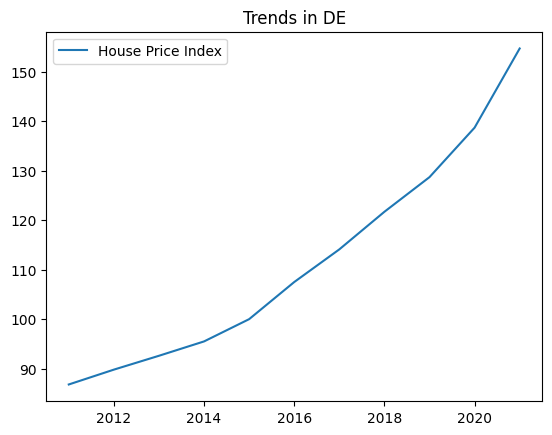

In [19]:
import matplotlib.pyplot as plt
country = "DE"  # Example: Germany
subset = df_long[df_long['geo']==country]
plt.plot(subset['year'], subset['house_price'], label='House Price Index')
plt.legend()
plt.title(f"Trends in {country}")
plt.show()


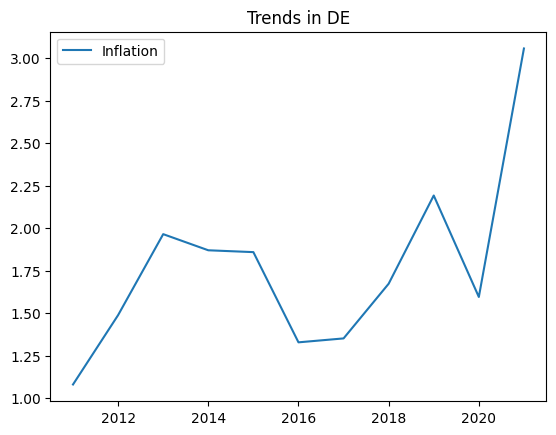

In [20]:
plt.plot(subset['year'], subset['inflation'], label='Inflation')
plt.legend()
plt.title(f"Trends in {country}")
plt.show()

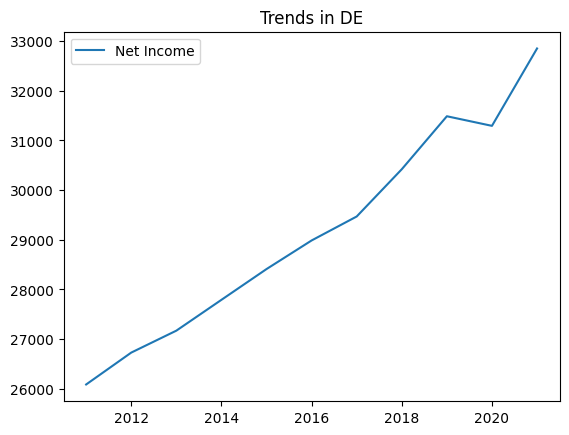

In [21]:
plt.plot(subset['year'], subset['earning'], label='Net Income')
plt.legend()
plt.title(f"Trends in {country}")
plt.show()

# how fast house prices,income are growing each year and measures affordability.

Higher value = houses are less affordable (prices high compared to incomes).

House price vs earnings (affordability_index) → directly measures if earnings keep up with house prices.

Inflation vs house prices (real_hpi, hpi_growth) → checks if inflation drives nominal prices up.
- **HPI** measures housing price changes relative to a base year (10).  
- It’s **nominal**, meaning it includes inflation effects.  
- To see the *true* change in housing values, we adjust for inflation:

- **Nominal HPI** shows observed price growth.  
- **Real HPI** shows actual value growth, removing inflation’s effect.  
- This is key for testing how much housing prices rise due to the market vs. inflation.  

Income growth vs house price growth → shows if house prices are growing faster than earnings (key for affordability).

In [22]:
df_long['hpi_growth'] = df_long.groupby('geo')['house_price'].pct_change() * 100
df_long['income_growth'] = df_long.groupby('geo')['earning'].pct_change() * 100
df_long['real_hpi'] = df_long['house_price'] / (1 + df_long['inflation']/100)
df_long['affordability_index'] = df_long['house_price'] / df_long['earning']
df_long.head()

,geo,country,year,house_price,inflation,earning,hpi_growth,income_growth,real_hpi,affordability_index
0,AT,Austria,2011,81.60,1.833637,26375.67,NaN,NaN,80.130694,0.003094
1,BE,Belgium,2011,95.61,1.807151,25519.86,NaN,NaN,93.912853,0.003746
2,BG,Bulgaria,2011,99.98,5.941922,3396.45,NaN,NaN,94.372462,0.029437
3,DE,Germany,2011,86.80,1.079937,26088.04,NaN,NaN,85.872630,0.003327
4,EE,Estonia,2011,69.32,5.399596,8324.26,NaN,NaN,65.768753,0.008327


# q1
# growth rate of house prices vs growth rate of earnings 
# Price - to - income ratio (PIR)



In [30]:
# Adjust house prices to their actual scale (if in hundreds)
df_long['house_price_scaled'] = df_long['house_price'] * 100

# Calculate the price-to-income ratio
df_long['price_to_income_ratio'] = (df_long['house_price_scaled'] / df_long['earning']).round(2)

# Display the first few rows to verify
df_long[['geo', 'country', 'year', 'house_price', 'house_price_scaled', 'earning', 'price_to_income_ratio']].head(29)

,geo,country,year,house_price,house_price_scaled,earning,price_to_income_ratio
0,AT,Austria,2011,81.60,8160.0,26375.67,0.31
1,BE,Belgium,2011,95.61,9561.0,25519.86,0.37
2,BG,Bulgaria,2011,99.98,9998.0,3396.45,2.94
3,DE,Germany,2011,86.80,8680.0,26088.04,0.33
4,EE,Estonia,2011,69.32,6932.0,8324.26,0.83
5,ES,Spain,2011,124.27,12427.0,19891.57,0.62
6,FI,Finland,2011,96.87,9687.0,28421.92,0.34
7,FR,France,2011,105.46,10546.0,25576.25,0.41
8,HU,Hungary,2011,90.45,9045.0,6146.32,1.47
9,IE,Ireland,2011,87.86,8786.0,31159.23,0.28


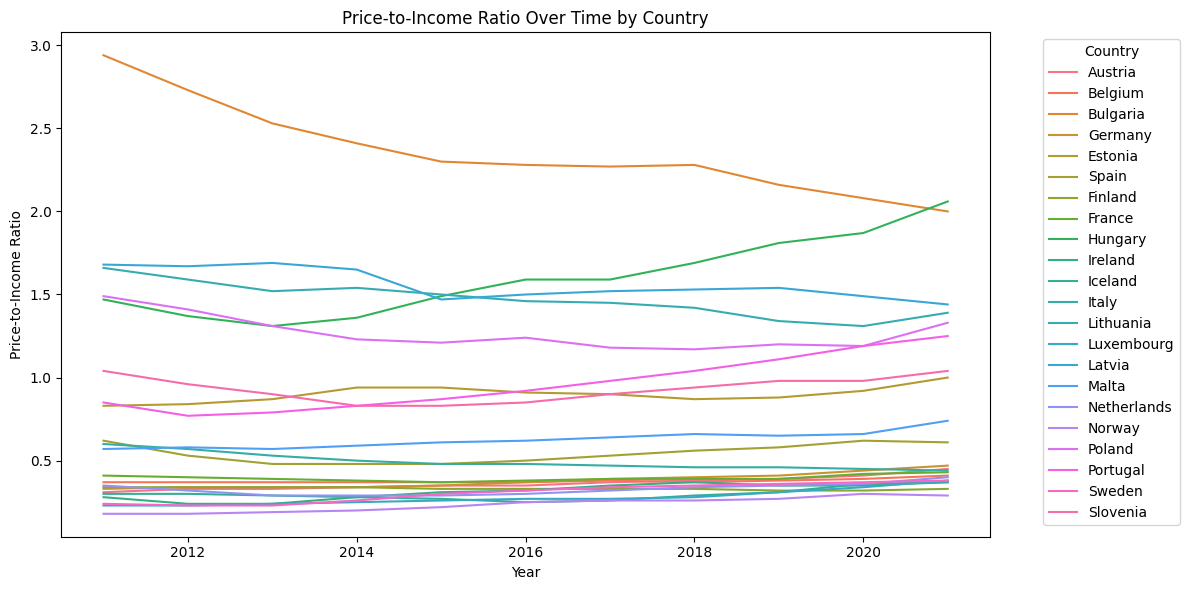

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for price-to-income ratio over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='year', y='price_to_income_ratio', hue='country')
plt.title('Price-to-Income Ratio Over Time by Country')
plt.ylabel('Price-to-Income Ratio')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Box plot for price-to-income ratio by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='country', y='price_to_income_ratio')
plt.title('Distribution of Price-to-Income Ratio by Country')
plt.ylabel('Price-to-Income Ratio')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

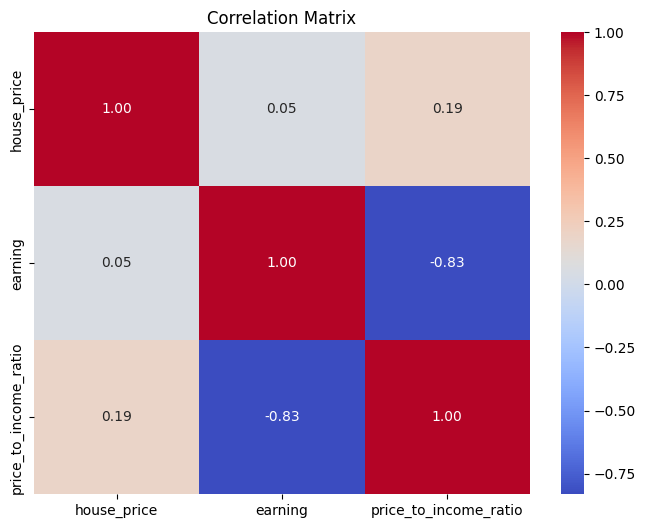

In [33]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df_long[['house_price', 'earning', 'price_to_income_ratio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

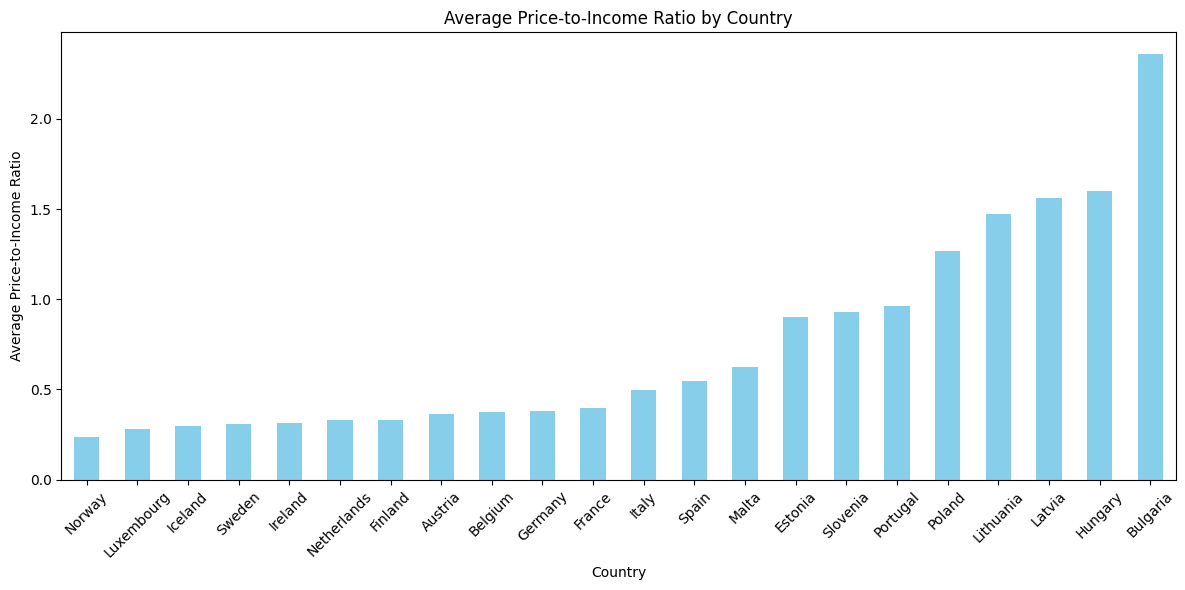

In [34]:
# Bar plot for average price-to-income ratio by country
avg_ratio = df_long.groupby('country')['price_to_income_ratio'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_ratio.plot(kind='bar', color='skyblue')
plt.title('Average Price-to-Income Ratio by Country')
plt.ylabel('Average Price-to-Income Ratio')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

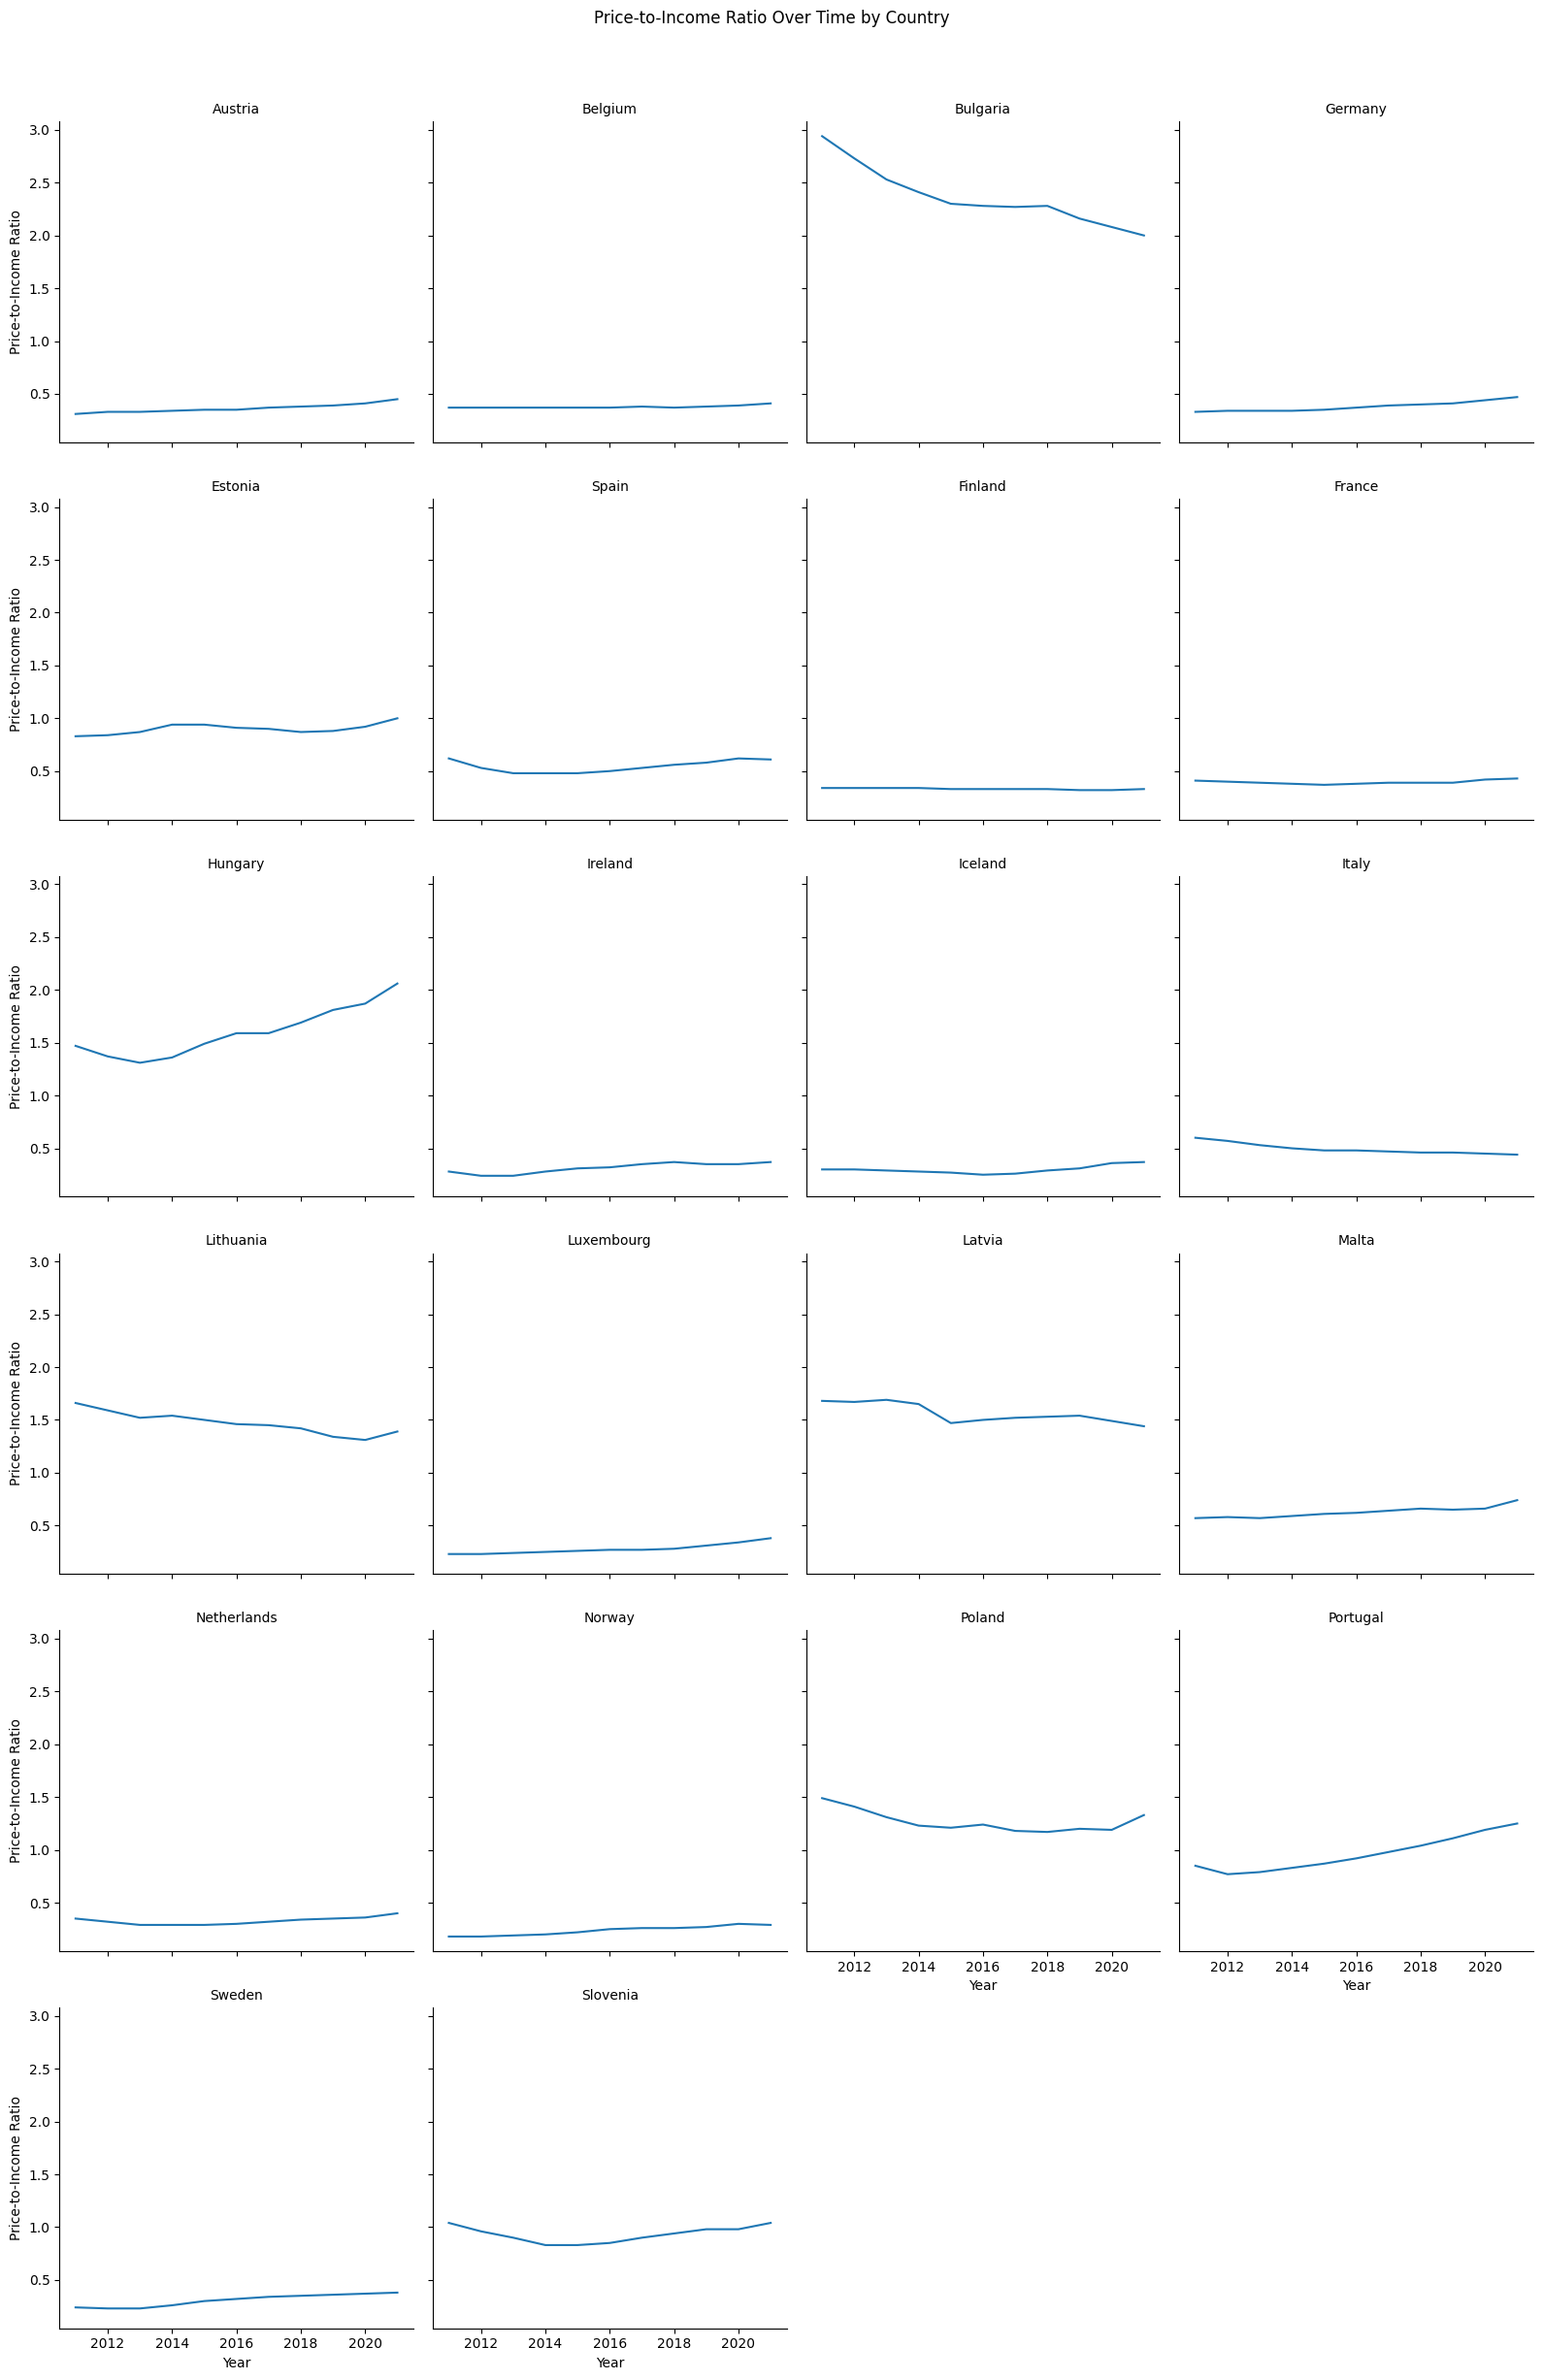

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Faceted line plot for price-to-income ratio over time
g = sns.FacetGrid(df_long, col='country', col_wrap=4, height=4, sharey=True)
g.map(sns.lineplot, 'year', 'price_to_income_ratio')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Price-to-Income Ratio")
g.fig.suptitle('Price-to-Income Ratio Over Time by Country', y=1.02)
plt.tight_layout()
plt.show()

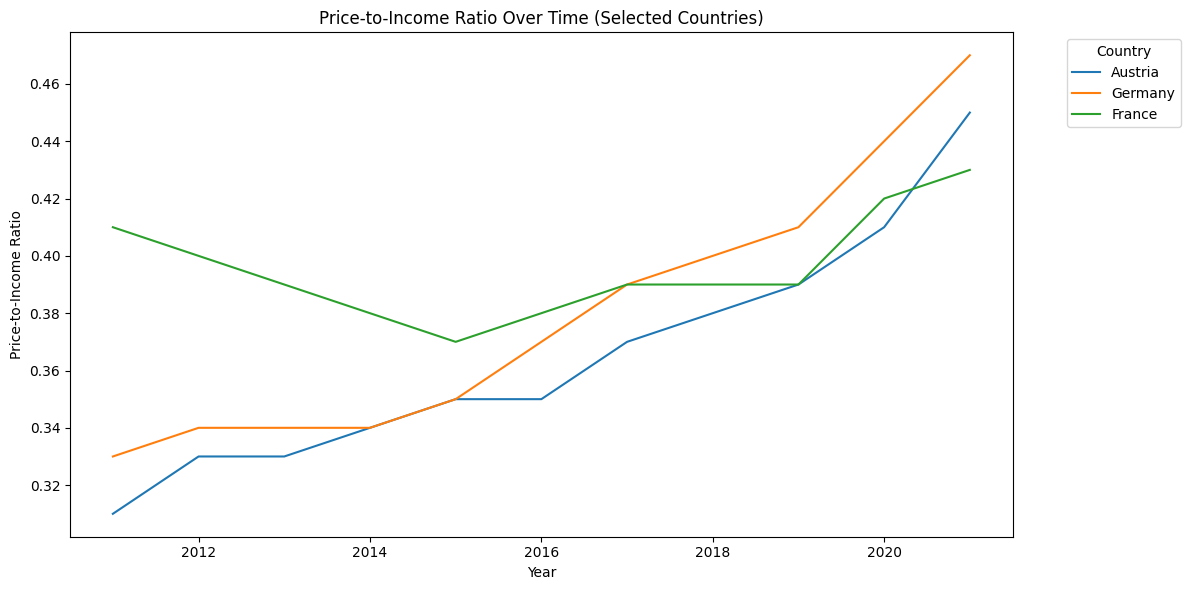

In [36]:
# Filter for specific countries
countries_of_interest = ['Austria', 'Germany', 'France']
filtered_df = df_long[df_long['country'].isin(countries_of_interest)]

# Line plot for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='year', y='price_to_income_ratio', hue='country')
plt.title('Price-to-Income Ratio Over Time (Selected Countries)')
plt.ylabel('Price-to-Income Ratio')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Filter data for a specific country (e.g., Austria)
country_data = df_long[df_long['country'] == 'Austria']

# Set 'year' as the index
country_data = country_data.set_index('year')

# Select the 'price_to_income_ratio' column
time_series = country_data['price_to_income_ratio']

# Fit the ARIMA model (p=1, d=1, q=1 as an example)
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast the next 5 years
forecast = model_fit.forecast(steps=5)
print("Forecasted Price-to-Income Ratios:")
print(forecast)

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Observed')
plt.plot(range(time_series.index[-1] + 1, time_series.index[-1] + 6), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for Price-to-Income Ratio')
plt.xlabel('Year')
plt.ylabel('Price-to-Income Ratio')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [1]:
# # import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select top 5 countries by average HPI
# top_countries = df_long.groupby('country')['real_hpi'].mean().nlargest(5).index
# df_top = df_long[df_long['country'].isin(top_countries)]

# # Color palette
# palette = sns.color_palette("tab10", n_colors=len(top_countries))

# plt.figure(figsize=(12,6))

# for i, country in enumerate(top_countries):
#     df_country = df_top[df_top['country'] == country]
#     plt.plot(df_country['year'], df_country['real_hpi'], color=palette[i])
#     # Direct label at the last point
#     plt.text(df_country['year'].max()+0.1, df_country['real_hpi'].iloc[-1], country, color=palette[i])

# # Add baseline/reference line
# plt.axhline(100, color='gray', linestyle='--', linewidth=1)  # baseline HPI

# # Highlight extreme spike
# extreme_country = 'Iceland'
# extreme_year = 2017
# extreme_value = df_top[(df_top['country']==extreme_country) & (df_top['year']==extreme_year)]['real_hpi'].values[0]
# plt.scatter(extreme_year, extreme_value, color='red', s=80, zorder=5)
# plt.text(extreme_year, extreme_value+5, f'{extreme_country} spike', color='red')

# plt.title('Real House Price Index Trends – Top Countries')
# plt.xlabel('Year')
# plt.ylabel('Real HPI')
# plt.show()


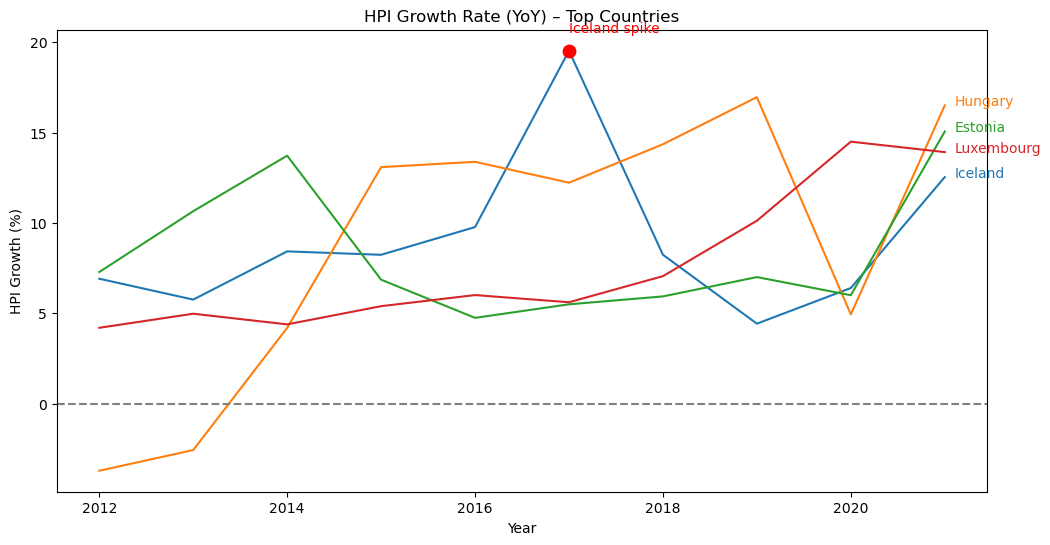

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Example: select top 5 countries by average growth
# top_countries = df_long.groupby('country')['hpi_growth'].mean().nlargest(4).index
# df_top = df_long[df_long['country'].isin(top_countries)]

# # Set color palette
# palette = sns.color_palette("tab10", n_colors=len(top_countries))

# plt.figure(figsize=(12,6))

# for i, country in enumerate(top_countries):
#     df_country = df_top[df_top['country'] == country]
#     plt.plot(df_country['year'], df_country['hpi_growth'], color=palette[i], label=country)
#     plt.text(df_country['year'].max()+0.1, df_country['hpi_growth'].iloc[-1], country, color=palette[i])

# # Highlight extreme growth
# extreme_country = 'Iceland'
# extreme_year = 2017
# extreme_value = df_top[(df_top['country']==extreme_country) & (df_top['year']==extreme_year)]['hpi_growth'].values[0]
# plt.scatter(extreme_year, extreme_value, color='red', s=80, zorder=5)
# plt.text(extreme_year, extreme_value+1, f'{extreme_country} spike', color='red')

# # Add 0% horizontal line
# plt.axhline(0, color='gray', linestyle='--')

# plt.title('HPI Growth Rate (YoY) – Top Countries')
# plt.xlabel('Year')
# plt.ylabel('HPI Growth (%)')
# plt.show()



In [2]:
countries = df_long['country'].unique()
fig, axes = plt.subplots(len(countries), 1, figsize=(12, 4*len(countries)), sharex=True)

for ax, country in zip(axes, countries):
    df_country = df_long[df_long['country'] == country]
    ax.plot(df_country['year'], df_country['real_hpi'], label='Real HPI')
    ax.plot(df_country['year'], df_country['house_price'], label='Nominal HPI')
    ax.set_title(country)
    ax.set_ylabel('House Price')
    ax.legend()

plt.xlabel('Year')
plt.show()


NameError: name 'df_long' is not defined

In [22]:
summary = df_long.groupby('country').agg(
    avg_hpi_growth=('hpi_growth','mean'),
    avg_income_growth=('income_growth','mean'),
    avg_affordability=('affordability_index','mean')
).sort_values('avg_hpi_growth', ascending=False)

print(summary)


             avg_hpi_growth  avg_income_growth  avg_affordability
country                                                          
Iceland            9.023159           6.929479           0.002989
Hungary            8.936393           5.127729           0.016020
Estonia            8.276088           6.294286           0.009021
Luxembourg         7.617306           2.176380           0.002789
Austria            6.533539           2.496889           0.003655
Lithuania          6.284621           8.156142           0.014713
Latvia             6.260878           7.861374           0.015616
Germany            5.977596           2.340821           0.003806
Sweden             5.970397           1.309614           0.003076
Ireland            5.527740           2.537729           0.003155
Norway             5.346815           0.645271           0.002368
Portugal           5.310610           1.210891           0.009639
Netherlands        4.366764           2.559629           0.003290
Malta     

In [23]:
corr = df_long[['house_price','inflation','earning']].corr()
print(corr)


             house_price  inflation   earning
house_price     1.000000   0.276392  0.048764
inflation       0.276392   1.000000 -0.041248
earning         0.048764  -0.041248  1.000000


In [3]:
# countries = df_long['country'].unique()
# import seaborn as sns
# for country in countries:
#     df_country = df_long[df_long['country'] == country]
#     corr = df_country[['house_price', 'real_hpi', 'earning', 'inflation']].corr()
    
#     plt.figure(figsize=(8,6))
#     sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
#     plt.title(f'Correlation Heatmap - {country}')
#     plt.show()


In [25]:
cross_country = df_long.groupby('country')['hpi_growth'].mean().sort_values(ascending=False)
print(cross_country)

country
Iceland        9.023159
Hungary        8.936393
Estonia        8.276088
Luxembourg     7.617306
Austria        6.533539
Lithuania      6.284621
Latvia         6.260878
Germany        5.977596
Sweden         5.970397
Ireland        5.527740
Norway         5.346815
Portugal       5.310610
Netherlands    4.366764
Malta          4.213728
Bulgaria       4.163950
Poland         3.524512
Belgium        2.903182
Slovenia       2.516180
France         1.669097
Finland        1.329214
Spain          0.862323
Italy         -1.452385
Name: hpi_growth, dtype: float64


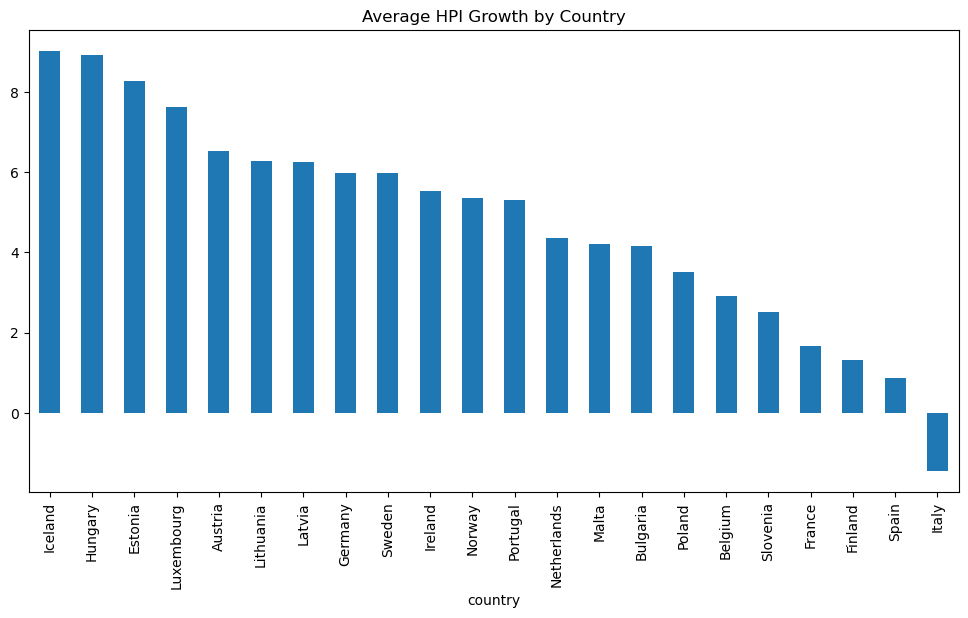

In [26]:
cross_country.plot(kind='bar', figsize=(12,6), title="Average HPI Growth by Country")
plt.show()
